In [14]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import *
import random


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('faqs.json', encoding="utf-8").read()
intents = json.loads(data_file)

In [16]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        # take each word and tokenize it
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # adding documents
        documents.append((w, intent['tag']))

        # adding classes to our class list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [17]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print (len(documents), "documents")

print (len(classes), "classes", classes)

print (len(words), "unique lemmatized words", words)


pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

88 documents
64 classes ['Amyotrophic Lateral Sclerosis', 'Are COVID-19 vaccines safe for people living with HIV', 'Are antibiotics effective in preventing or treating the COVID-19', 'Are people with tuberculosis likely to be at increased risk of COVID-19 infection, illness and death', 'Are pools and water areas safe to use', 'Are there any medicines or therapies that can prevent or cure COVID-19', 'Are there precautions to take while eating in a restaurant', 'As a smoker, am I likely to get more severe symptoms if infected', 'As a smoker, is my risk of getting the COVID-19 virus higher than that of a non-smoker', 'Asthma', 'COVID-19 (Coronavirus) & COPD', 'COVID-19 (Coronavirus) & Cancer', 'COVID-19 (Coronavirus) & Cystic Fibrosis ', 'COVID-19 (Coronavirus) & Diabetes', 'Can I have the second dose with a different vaccine than the first dose', 'Can we stop taking precautions after being vaccinated', 'Can you get the virus from people who were in the room previous to you', 'Dementia', 

In [18]:
training = []
output_empty = [0] * len(classes)
for doc in documents:
    # initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


<ipython-input-18-3544dc409e53>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training = np.array(training)


In [24]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

#fitting and saving the model'
history = model.fit(np.array(train_x), np.array(train_y),validation_data=(np.array(train_x), np.array(train_y)), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', history)

print("model created")



Epoch 1/200
18/18 [==============================] - 2s 33ms/step - loss: 0.0154 - accuracy: 0.0283 - val_loss: 0.0154 - val_accuracy: 0.0909
Epoch 2/200
18/18 [==============================] - 0s 10ms/step - loss: 0.0154 - accuracy: 0.0204 - val_loss: 0.0153 - val_accuracy: 0.1705
Epoch 3/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.0248 - val_loss: 0.0153 - val_accuracy: 0.2614
Epoch 4/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.0618 - val_loss: 0.0153 - val_accuracy: 0.2955
Epoch 5/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.1543 - val_loss: 0.0152 - val_accuracy: 0.3068
Epoch 6/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.0934 - val_loss: 0.0151 - val_accuracy: 0.3182
Epoch 7/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.1164 - val_loss: 0.0150 - val_accuracy: 0.2955
Epoch 8/200

18/18 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 0.7772 - val_loss: 0.0023 - val_accuracy: 0.9318
Epoch 59/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.6513 - val_loss: 0.0022 - val_accuracy: 0.9432
Epoch 60/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0059 - accuracy: 0.7123 - val_loss: 0.0022 - val_accuracy: 0.9318
Epoch 61/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 0.8082 - val_loss: 0.0022 - val_accuracy: 0.9432
Epoch 62/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.7562 - val_loss: 0.0021 - val_accuracy: 0.9432
Epoch 63/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.7320 - val_loss: 0.0020 - val_accuracy: 0.9659
Epoch 64/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0059 - accuracy: 0.7366 - val_loss: 0.0019 - val_accuracy: 0.9432
Epoch 65/200
18/18 

Epoch 115/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 0.8825 - val_loss: 1.5855e-04 - val_accuracy: 1.0000
Epoch 116/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 0.8447 - val_loss: 1.5896e-04 - val_accuracy: 1.0000
Epoch 117/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 0.9156 - val_loss: 1.4742e-04 - val_accuracy: 1.0000
Epoch 118/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 0.8330 - val_loss: 1.2935e-04 - val_accuracy: 1.0000
Epoch 119/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 0.8509 - val_loss: 1.1732e-04 - val_accuracy: 1.0000
Epoch 120/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 0.8807 - val_loss: 1.1458e-04 - val_accuracy: 1.0000
Epoch 121/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.9886 - val_loss: 1.047

18/18 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.9459 - val_loss: 9.9209e-06 - val_accuracy: 1.0000
Epoch 171/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 0.9629 - val_loss: 9.8178e-06 - val_accuracy: 1.0000
Epoch 172/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 0.9472 - val_loss: 9.4731e-06 - val_accuracy: 1.0000
Epoch 173/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 0.8599 - val_loss: 8.7655e-06 - val_accuracy: 1.0000
Epoch 174/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 0.9612 - val_loss: 8.3894e-06 - val_accuracy: 1.0000
Epoch 175/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 0.9520 - val_loss: 7.5011e-06 - val_accuracy: 1.0000
Epoch 176/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 0.9049 - val_loss: 7.0479e-06 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


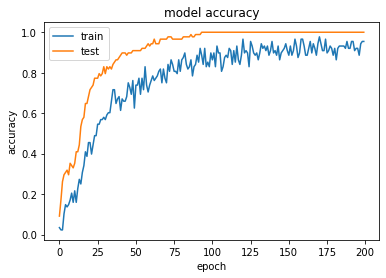

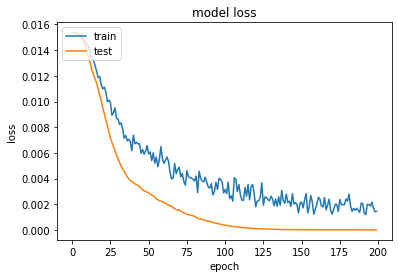

In [25]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('faqs.json', encoding="utf-8").read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [22]:
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res

In [23]:
#Creating GUI with tkinter
import tkinter
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))

        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')

        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("Hello")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)

base.mainloop()